In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("./Disease_symptom_and_patient_profile_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [4]:
df.isna().any()

Disease                 False
Fever                   False
Cough                   False
Fatigue                 False
Difficulty Breathing    False
Age                     False
Gender                  False
Blood Pressure          False
Cholesterol Level       False
Outcome Variable        False
dtype: bool

In [5]:
df.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [6]:
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

In [7]:
df2 = df.copy()
df.drop("Disease",axis = 1, inplace = True)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
en = LabelEncoder()
encoded_rout={}
internal_rout={}

In [10]:
lst = ["Outcome Variable","Fever","Cough","Fatigue","Difficulty Breathing","Gender","Blood Pressure","Cholesterol Level"]
for i in lst:
    en.fit(df[i])
    df[i]=en.transform(df[i])
    for j in range(df[i].size):
        internal_rout[df2.loc[j,i]]=df.loc[j,i]
    encoded_rout[i] = internal_rout
    internal_rout = {}
    

In [11]:
encoded_rout

{'Outcome Variable': {'Positive': 1, 'Negative': 0},
 'Fever': {'Yes': 1, 'No': 0},
 'Cough': {'No': 0, 'Yes': 1},
 'Fatigue': {'Yes': 1, 'No': 0},
 'Difficulty Breathing': {'Yes': 1, 'No': 0},
 'Gender': {'Female': 0, 'Male': 1},
 'Blood Pressure': {'Low': 1, 'Normal': 2, 'High': 0},
 'Cholesterol Level': {'Normal': 2, 'Low': 1, 'High': 0}}

In [12]:
df.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,1,0,1,1,19,0,1,2,1
1,0,1,1,0,25,0,2,2,0
2,0,1,1,0,25,0,2,2,0
3,1,1,0,1,25,1,2,2,1
4,1,1,0,1,25,1,2,2,1


<Axes: ylabel='Outcome Variable'>

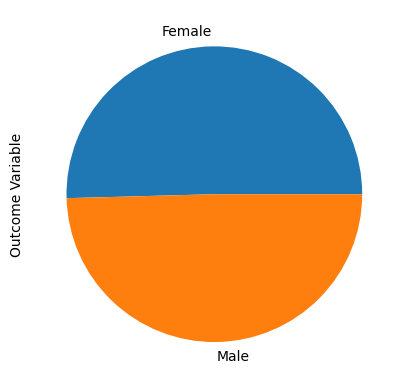

In [13]:
df2.groupby("Gender")["Outcome Variable"].size().plot.pie()

<Axes: xlabel='Age', ylabel='Count'>

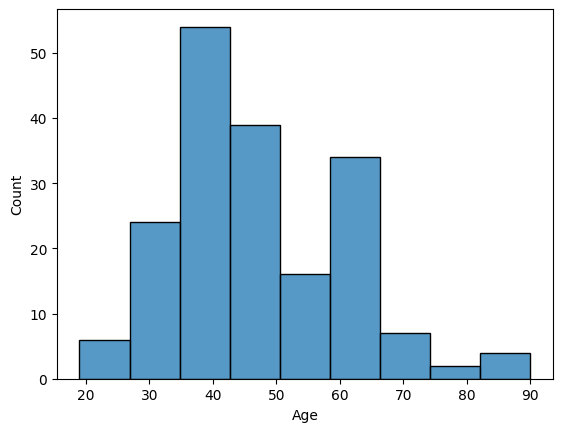

In [14]:
# age level who has desease 
d = df2[df2["Outcome Variable"]=="Positive"]["Age"]
sns.histplot(d)


In [15]:
d.value_counts().head()

Age
45    23
35    22
40    22
60    18
30    16
Name: count, dtype: int64

<Axes: ylabel='count'>

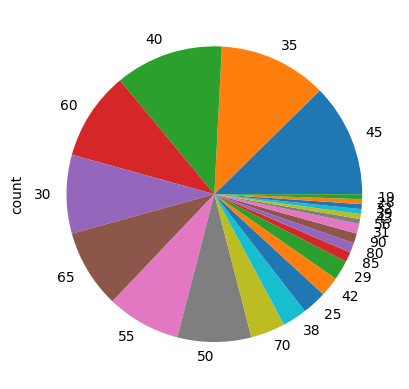

In [16]:
d.value_counts().plot.pie()

In [17]:
# from the above analysis we found that 
# 1. at the age of 45 more patients are likely to have disease
# 2. at the age of 35 and 40 follwed by

In [18]:
str(round((df2[df2["Outcome Variable"]=="Positive"]["Age"].value_counts()[45]/df2[df2["Outcome Variable"]=="Positive"]["Age"].count())*100))+"%"

'12%'

In [19]:
"percentage of age 45 who got sisease is 12%"

'percentage of age 45 who got sisease is 12%'

# ml prediction 

In [20]:
import sklearn.model_selection as ms 
from sklearn.metrics import accuracy_score

In [21]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [22]:
xtrain,xtest,ytrain,ytest = ms.train_test_split(x,y,test_size=0.3,random_state = 42)

In [23]:
# models

In [24]:
models=[DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]

In [25]:
for i in models:
    i.fit(xtrain,ytrain)
    score = i.score(xtest,ytest)
    print(str(i),"=>",score)
    print("==>",accuracy_score(ytest,i.predict(xtest)))

DecisionTreeClassifier() => 0.6857142857142857
==> 0.6857142857142857
SVC() => 0.5428571428571428
==> 0.5428571428571428
RandomForestClassifier() => 0.7714285714285715
==> 0.7714285714285715
KNeighborsClassifier() => 0.5523809523809524
==> 0.5523809523809524


In [26]:
# from the above score we conclude that Random forest has highest score

In [27]:
# so we consider Random forest score 
# now using grid search cv find the best parameters for aur algorithm


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
params = {
    "criterion":['entropy', 'gini', 'log_loss'],
    "max_depth":[1,2,3,4,5,10,20,25,30],
    "max_features":["sqrt","log2"]
}

In [30]:
model = GridSearchCV(RandomForestClassifier(),param_grid=params,cv = 8 ,error_score = "raise" )

In [31]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=8, error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 20, 25, 30],
                         'max_features': ['sqrt', 'log2']})

In [32]:
print(model.best_params_)

{'criterion': 'log_loss', 'max_depth': 30, 'max_features': 'sqrt'}


In [33]:
accuracy_score(ytest,model.predict(xtest))

0.7619047619047619

In [34]:
model.best_score_

0.8075268817204301

In [35]:
# so now we can see the best score of gridsearchcv model is higher than the random forest classsifier

In [36]:
#menu driven program

In [ ]:
while True:
    print("welcome to disease prediction: ")
    fvr = int(input(f"do you have fever? {encoded_rout['Fever']}"))
    cgh = int(input(f"do you have cough? {encoded_rout['Cough']}"))
    fat = int(input(f"do you have fatigue? {encoded_rout['Fatigue']}"))
    bth = int(input(f"do you have difficulty in breathing? {encoded_rout['Difficulty Breathing']}"))
    age = int(input("age ?"))
    gndr = int(input(f"gender? {encoded_rout['Gender']}"))
   
    bld = int(input(f"blood pressure level? {encoded_rout['Blood Pressure']}"))
    chl = int(input(f"Cholestrole level? {encoded_rout['Cholesterol Level']}"))
    output = model.predict([[fvr,cgh,fat,bth,age,gndr,bld,chl]])
    if output==1:
        print(f"there is a {round(model.best_score_,2)*100}% chance that you have disease")
    else:
        print(f"there is a {round(model.best_score_,2)*100}% chance that you dont have disease")
    x =int(input("want to quit (0 to no, 1 to yes)"))
    if x==1:
        break
    print()

welcome to disease prediction: 


do you have fever? {'Yes': 1, 'No': 0} 1
do you have cough? {'No': 0, 'Yes': 1} 1
do you have fatigue? {'Yes': 1, 'No': 0} 0
do you have difficulty in breathing? {'Yes': 1, 'No': 0} 0
age ? 56
gender? {'Female': 0, 'Male': 1} 0
blood pressure level? {'Low': 1, 'Normal': 2, 'High': 0} 0
Cholestrole level? {'Normal': 2, 'Low': 1, 'High': 0} 0


C:\Users\surya_hwzjtax\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


there is a 81.0% chance that you have disease


want to quit (0 to no, 1 to yes) 0



welcome to disease prediction: 


do you have fever? {'Yes': 1, 'No': 0} 0
do you have cough? {'No': 0, 'Yes': 1} 0
do you have fatigue? {'Yes': 1, 'No': 0} 0
do you have difficulty in breathing? {'Yes': 1, 'No': 0} 0
age ? 34
gender? {'Female': 0, 'Male': 1} 1
blood pressure level? {'Low': 1, 'Normal': 2, 'High': 0} 1
Cholestrole level? {'Normal': 2, 'Low': 1, 'High': 0} 1


C:\Users\surya_hwzjtax\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


there is a 81.0% chance that you dont have disease
